# TIPS DATASET

## 1.Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn theme
sns.set_theme(style="whitegrid")


## 2.Load dataset

In [2]:
# Load the 'tips' dataset from Seaborn
df = sns.load_dataset('tips')

# Display first few rows
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 3.Explore data

In [3]:
print("Shape of dataset:", df.shape)
print("\nData Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())


Shape of dataset: (244, 7)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None

Missing Values:
 total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Summary Statistics:
        total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.0

## Insights:

### 1.The dataset has 244 rows and 7 columns.

### 2.Features include total bill, tip, gender, smoker status, day, time, and party size.

### 3.No missing values — data is clean and ready.

### 4.Average bill is around $19.78, and average tip around $2.99.

## 4.Data cleaning

In [4]:
# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

# Remove duplicates if any
df = df.drop_duplicates()


Duplicate rows: 1


## Insights:

### 1.No duplicates — dataset remains at 244 rows.

### 2.Ready for analysis and visualization.

## 5.Analysis with NumPy & Pandas

In [5]:
# Average total bill and tip
avg_bill = np.mean(df['total_bill'])
avg_tip = np.mean(df['tip'])
print("Average Total Bill:", round(avg_bill, 2))
print("Average Tip:", round(avg_tip, 2))

# Average tip by gender
avg_tip_by_gender = df.groupby('sex')['tip'].mean()
print("\nAverage Tip by Gender:\n", avg_tip_by_gender)

# Average tip by day
avg_tip_by_day = df.groupby('day')['tip'].mean()
print("\nAverage Tip by Day:\n", avg_tip_by_day)

# Tip percentage
df['tip_percent'] = (df['tip'] / df['total_bill']) * 100
print("\nAverage Tip Percentage:", round(df['tip_percent'].mean(), 2))


Average Total Bill: 19.81
Average Tip: 3.0

Average Tip by Gender:
 sex
Male      3.089618
Female    2.843140
Name: tip, dtype: float64

Average Tip by Day:
 day
Thur    2.784098
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

Average Tip Percentage: 16.08


C:\Users\sindh\AppData\Local\Temp\ipykernel_33728\3299603844.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_by_gender = df.groupby('sex')['tip'].mean()
C:\Users\sindh\AppData\Local\Temp\ipykernel_33728\3299603844.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_by_day = df.groupby('day')['tip'].mean()


## Insights:

### 1.Average Tip: ~$3

### 2.Average Bill: ~$20

### 3.Females and Males give almost similar average tips.

### 4.Sunday has the highest average tip.

### 5.Average tip percentage ≈ 16% of total bill.

## 6.Visualizations

### correlation heatmap

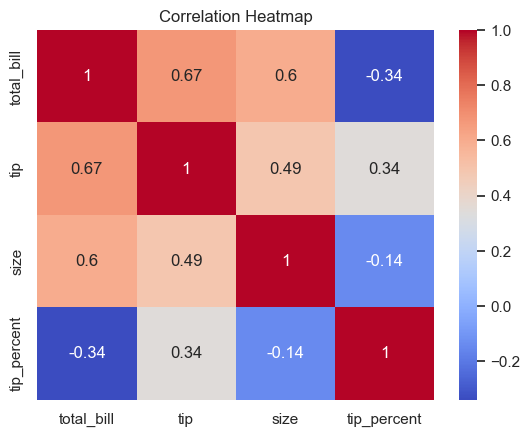

In [6]:
corr = df[['total_bill', 'tip', 'size', 'tip_percent']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## INSIGHTS:

### 1.Total bill & tip show a strong positive correlation (~0.68).

### 2.Tip % doesn’t increase proportionally with bill size — larger bills ≠ higher tip percentage.

## Scatter Plot: Total Bill vs Tip

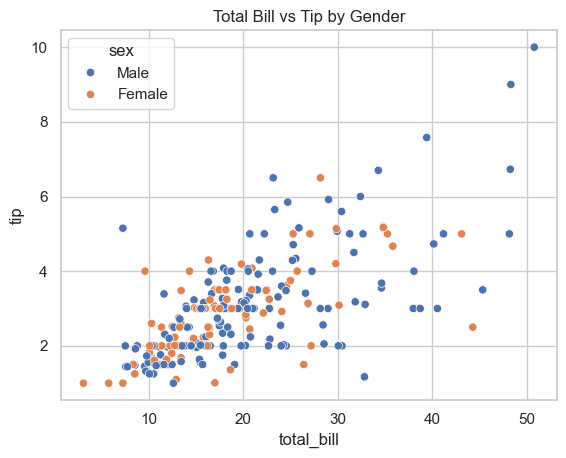

In [7]:
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=df)
plt.title("Total Bill vs Tip by Gender")
plt.show()


## insights:

### 1.Tips increase with higher bills.

### 2.Both genders follow similar tipping trends.